# **Package Installation & Importing the Libraries**

In [1]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 6.4 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [3]:
# importing the libraries
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, roc_curve, auc
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_selection import chi2
import plotly.express as px
import seaborn as sns
import warnings
import random
warnings.filterwarnings('ignore')

# **Exploratory Data Analysis (EDA)**

In [4]:
# loading the dataset
df = pd.read_csv('/content/augmented_data.csv')
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [8]:
colors = ['#d5e0fe', '#656371','#ff7369']
lowLungCancer = len(df[df['Level'] == 0])
highLungCancer = len(df[df['Level'] == 1])
mediumLungCancer = len(df[df['Level'] == 2])
fig = go.Figure(data=[go.Pie(labels=['Low','High','Medium'], values=[lowLungCancer, highLungCancer, mediumLungCancer])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20, marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(font=dict(size=24,))
fig.show()

The distribution of the 3 levels of risk of lung cancer are shown above. We see that the data is balanced with the following propotions: 
1. 33.8% of all the patients have high risk of having lung cancer
2. 35% of the patients have medium risk of having lung cancer
3. 31.2% of the patients have low risk of having lung cancer

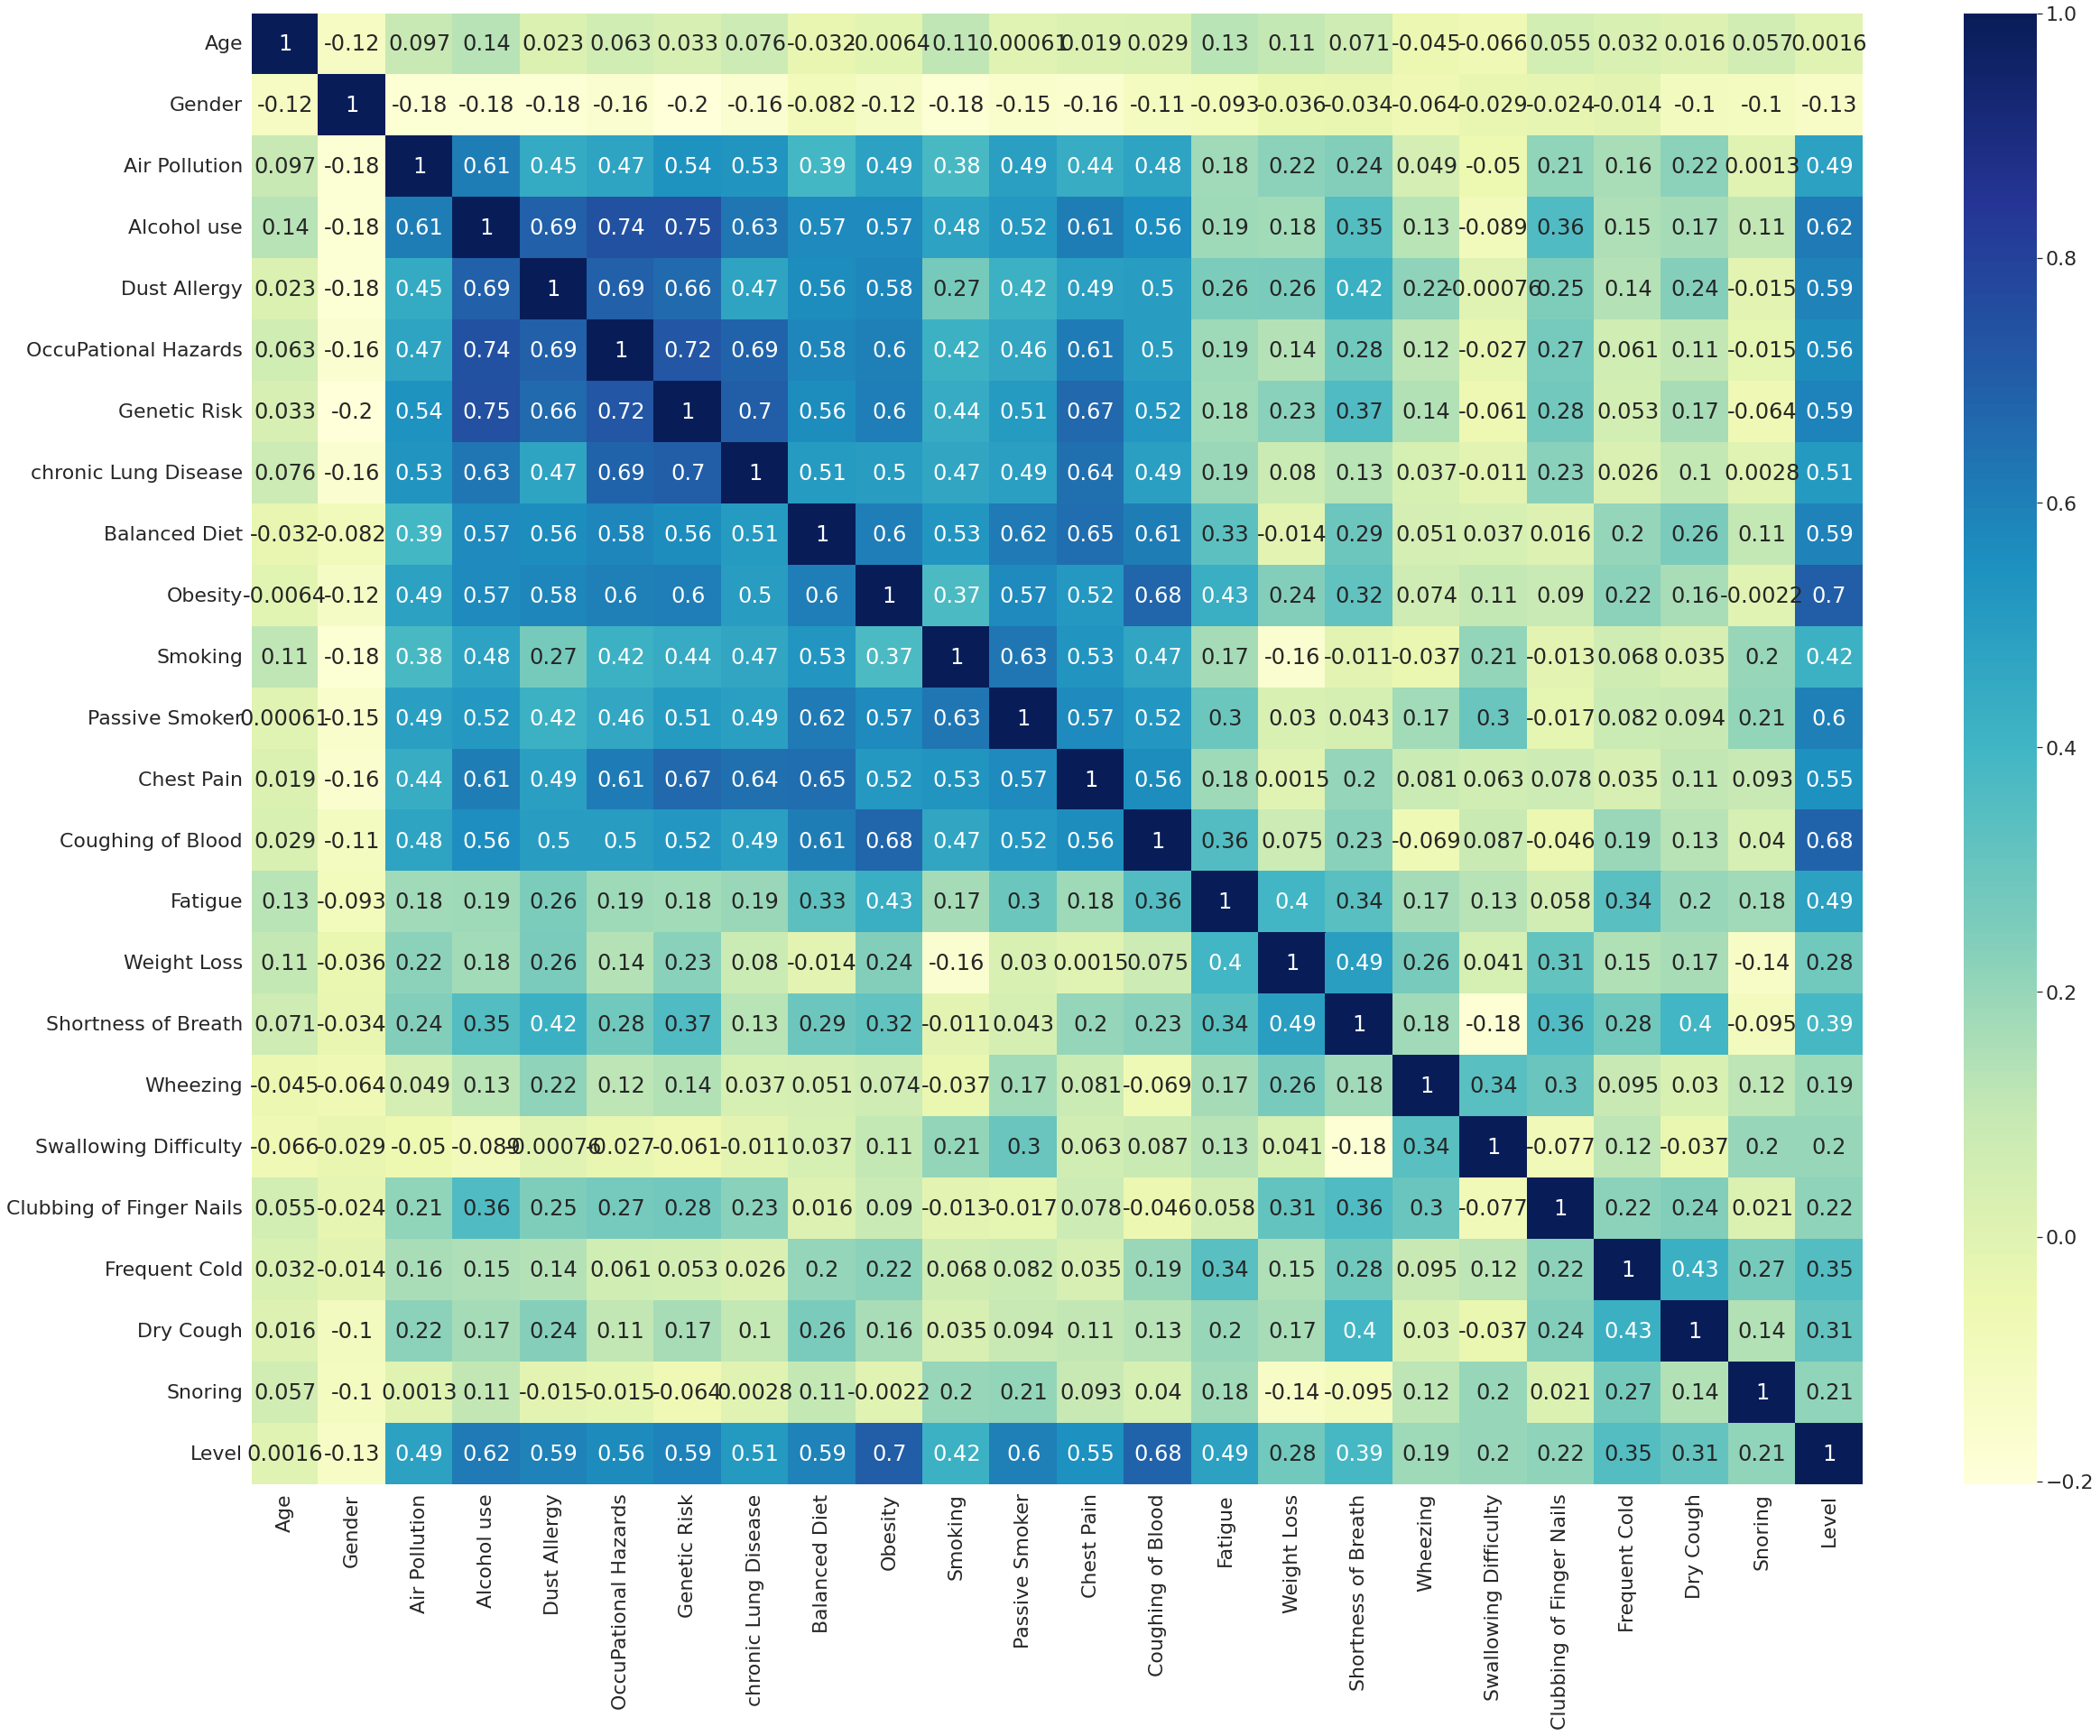

In [9]:
plt.figure(figsize = (40, 30))
sns.set(font_scale=2)
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")

Among all the features that causes lung cancer, the following are some of the major features which are highly  correlated with the target feature:- 

1. alcohol use
2. dust allergy
3. occupational hazard
4. genetic risk
5. chronic lung disease
6. obesity
7. passive smoker
8. chest pain
9. coughing of blood

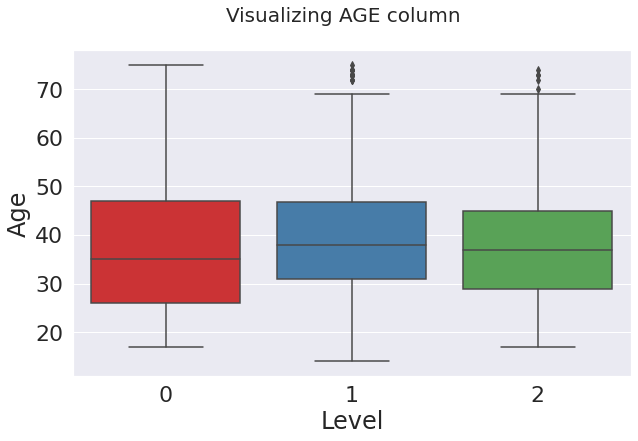

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x=df['Level'], y=df['Age'], ax=ax, palette="Set1")
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

It was surprising to see that risk of level of lung cancer doest not depend on age and thus people of any age are susciptible to having cancer. The same can also be inferred from the above boxplot as the distribution of low medium and high level of lung cancer is almost the same

In [11]:
age_bins = pd.cut(df['Age'], bins = [1,10,20,30,40,50,60,70,80,90], include_lowest = True)

df1 = pd.DataFrame(age_bins)
df1['Gender'] = df['Gender']

df2 = df1.groupby(by=["Age", "Gender"]).size().reset_index(name="counts")
df2['Gender'] = df2['Gender'].astype(str)
df2['Age'] = df2['Age'].astype(str)

fig = px.bar(data_frame=df2, x="Age", y="counts", color="Gender", barmode="group",
             color_discrete_map={
                '1': '#4682B4',
                '2': '#B0C4DE'
                }
            )

newnames = {'1':'Male', '2': 'Female'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     ))
fig.update_layout(font=dict(size=20,))
fig.show()

Observation from above distributio of 
1. The dataset contains people from age 10 to 80
2. The dataset constitutes mostly of people from age group 20 to 50
3. In the age group of 20-30, females are more in number than males whereas in all the different buckets male has a higher population count.

In [12]:
age_bins = pd.cut(df['Age'], bins = [1,10,20,30,40,50,60,70,80,90], include_lowest = True)

df1 = pd.DataFrame(age_bins)
df1['Level'] = df['Level']

df2 = df1.groupby(by=["Age", "Level"]).size().reset_index(name="counts")
df2['Level'] = df2['Level'].astype(str)
df2['Age'] = df2['Age'].astype(str)

fig = px.bar(data_frame=df2, x="Age", y="counts", color="Level", barmode="group",
             color_discrete_map={
                    '0': '#CD5C5C',
                    '1': '#F08080',
                    '2': '#FFDAB9'
                  })

newnames = {'0':'Low', '1': 'Medium','2':'High'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     ))

fig.update_layout(font=dict(size=20,))
fig.show()


##### In the age groups of 20-30 and 30-40 there is a huge difference is the risk of having low and high level of lung cancer as compared to the rest of the age groups

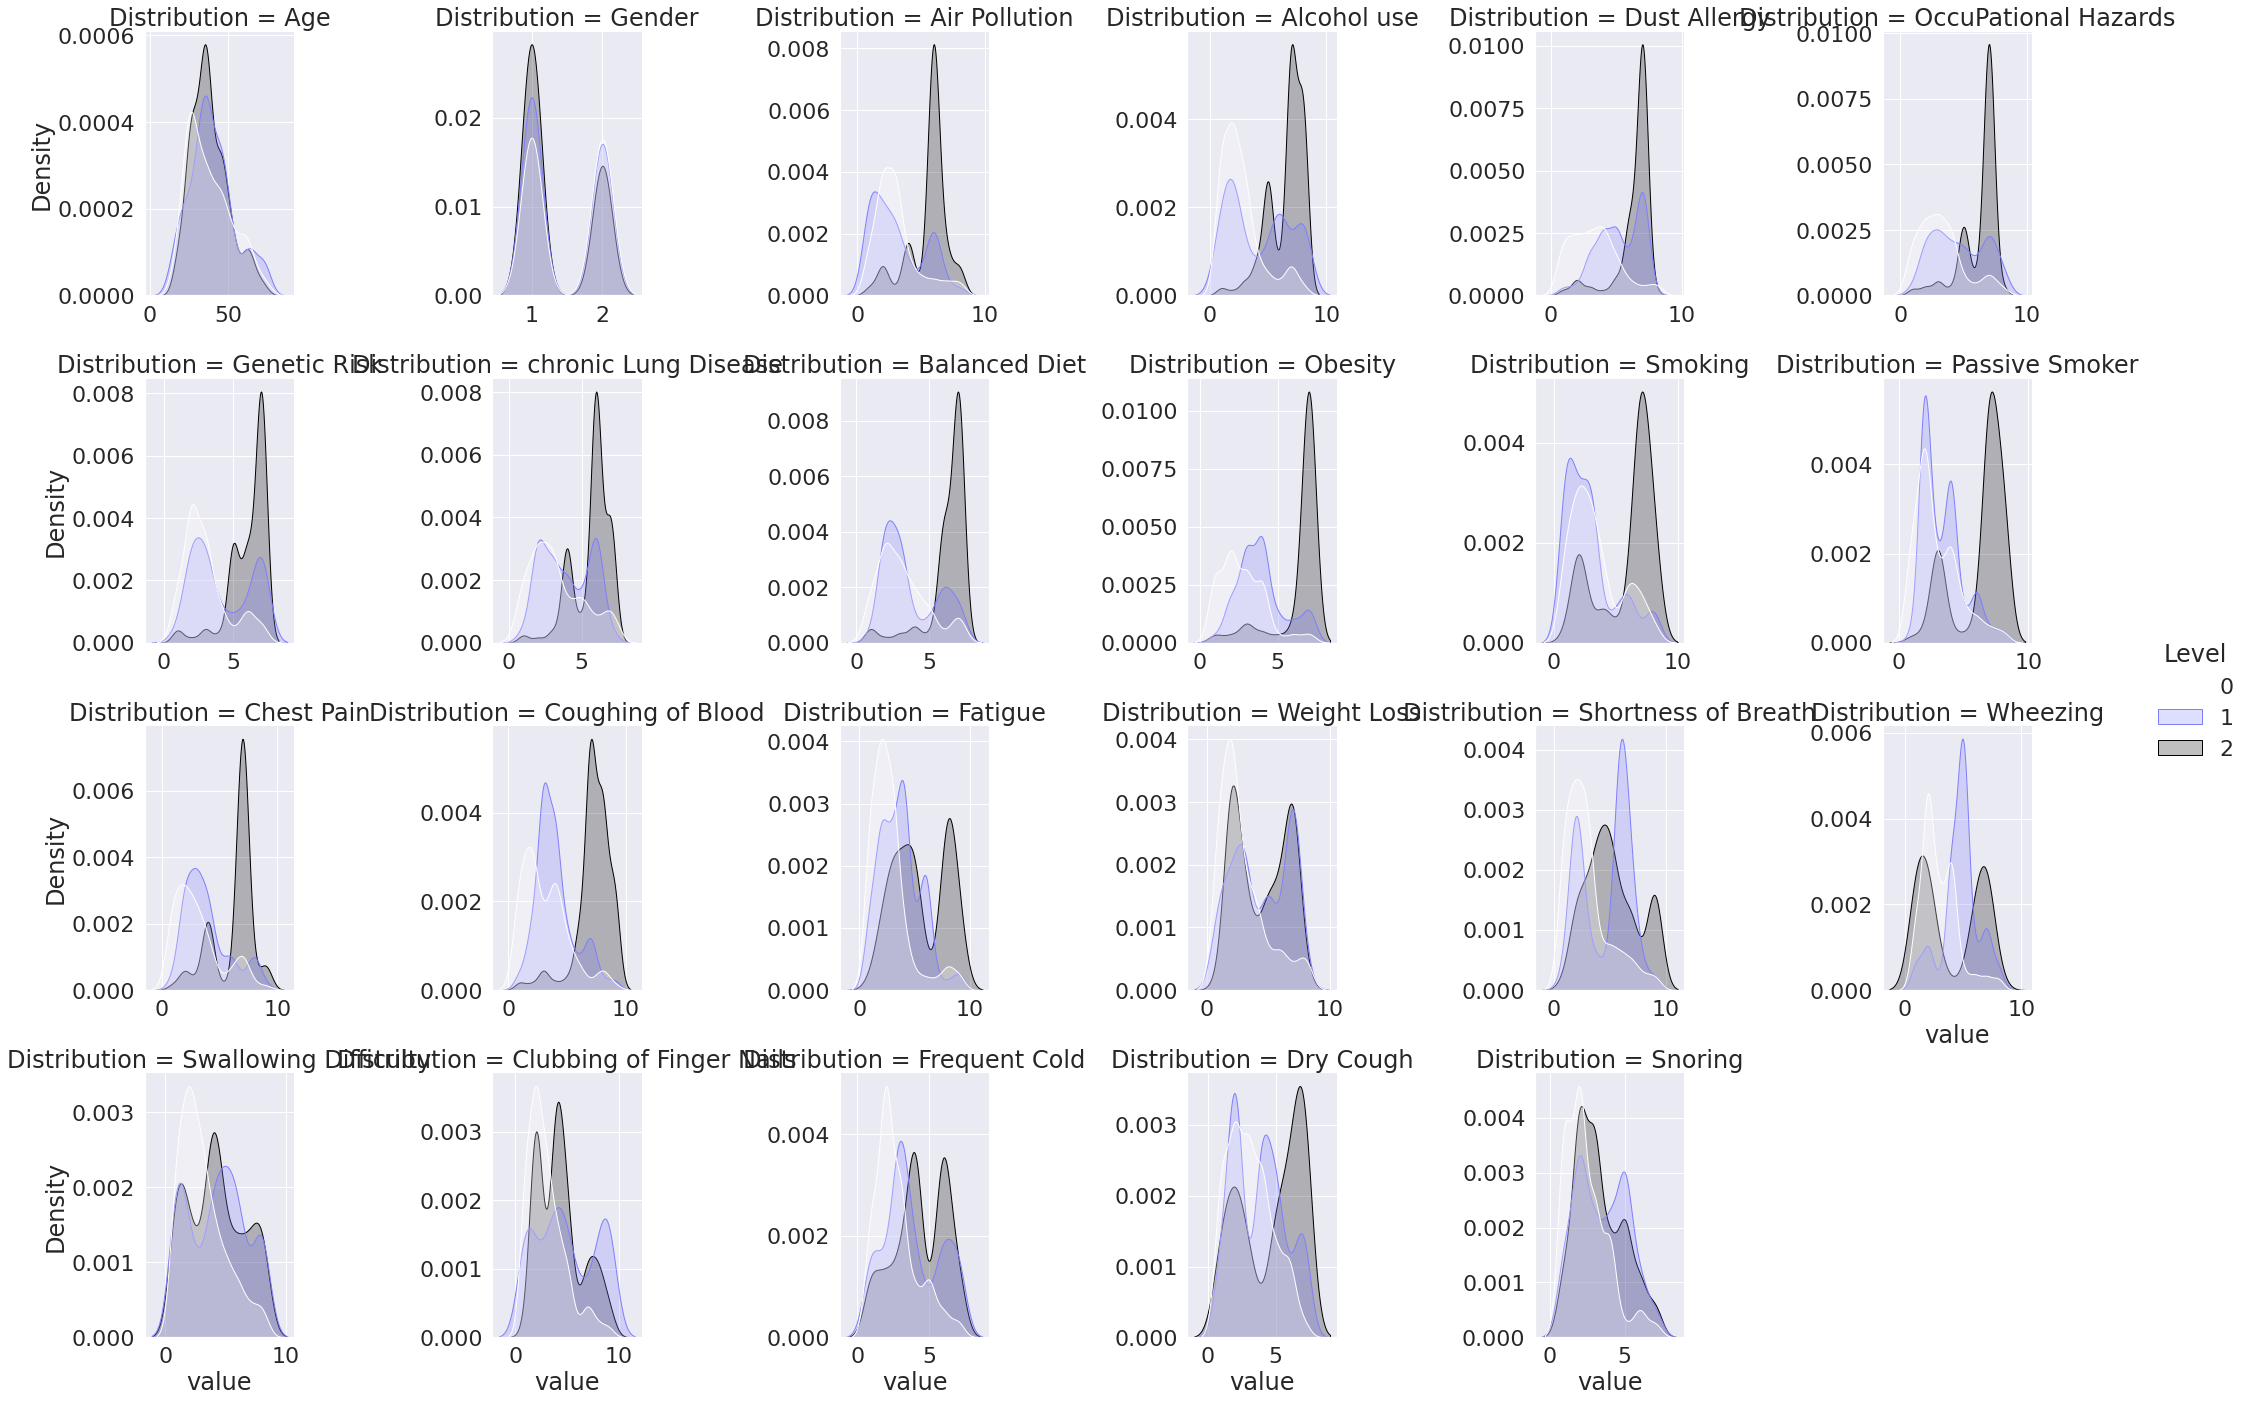

In [13]:
dfm = df.melt(id_vars='Level', var_name='Distribution')
sns.set(font_scale=2)
sns.displot(kind='kde', data=dfm, col='Distribution',col_wrap=6, x='value', hue='Level', fill=True, 
            facet_kws={'sharey': False, 'sharex': False},palette="gist_stern_r")

Observations inferred from distribution plots of independant features:-
1. For majority of the distribution plots, it can be seen that "grey" density area is spiked up when the value in x-axis increases, which means that when value of the cause (like lung disease,occupational hazard, chest pain) increases, level of risk of lung cancer also increases.

2. Chances of level of risk of lung cancer are high, with increasing level of air pollution. Though in some cases, where the level of air pollution is less, there are still risks that the person might get high level of lung cancer.

3. People who consume less alcohol, are at least risk of having lung cancer and people who consume more alcohol have more risk of getting high level of lung cancer.

4. With increasing "Dust Allergy" level, severity/risk of having lung cancer is increases.

5. In case of Smoking, low level of smoking contributes more to "low" and "medium" risk of Lung Cancer, whereas high level of smoking only cause to "High" severity of lung cancer.

6. Passive smoking is as bad as smoking and it can be seen that low level of passive smoking contributes more towards "Medium" severity of lung cancer and "High" level of smoking causes "High" Severity lung cancer.

7. Male have higher risk of lung cancer as compared to females.

8. "Coughing blood" beyond a level of 5 causes high risk of lung cancer and a lesser level than 5 causes low and medium risk of lung cancer


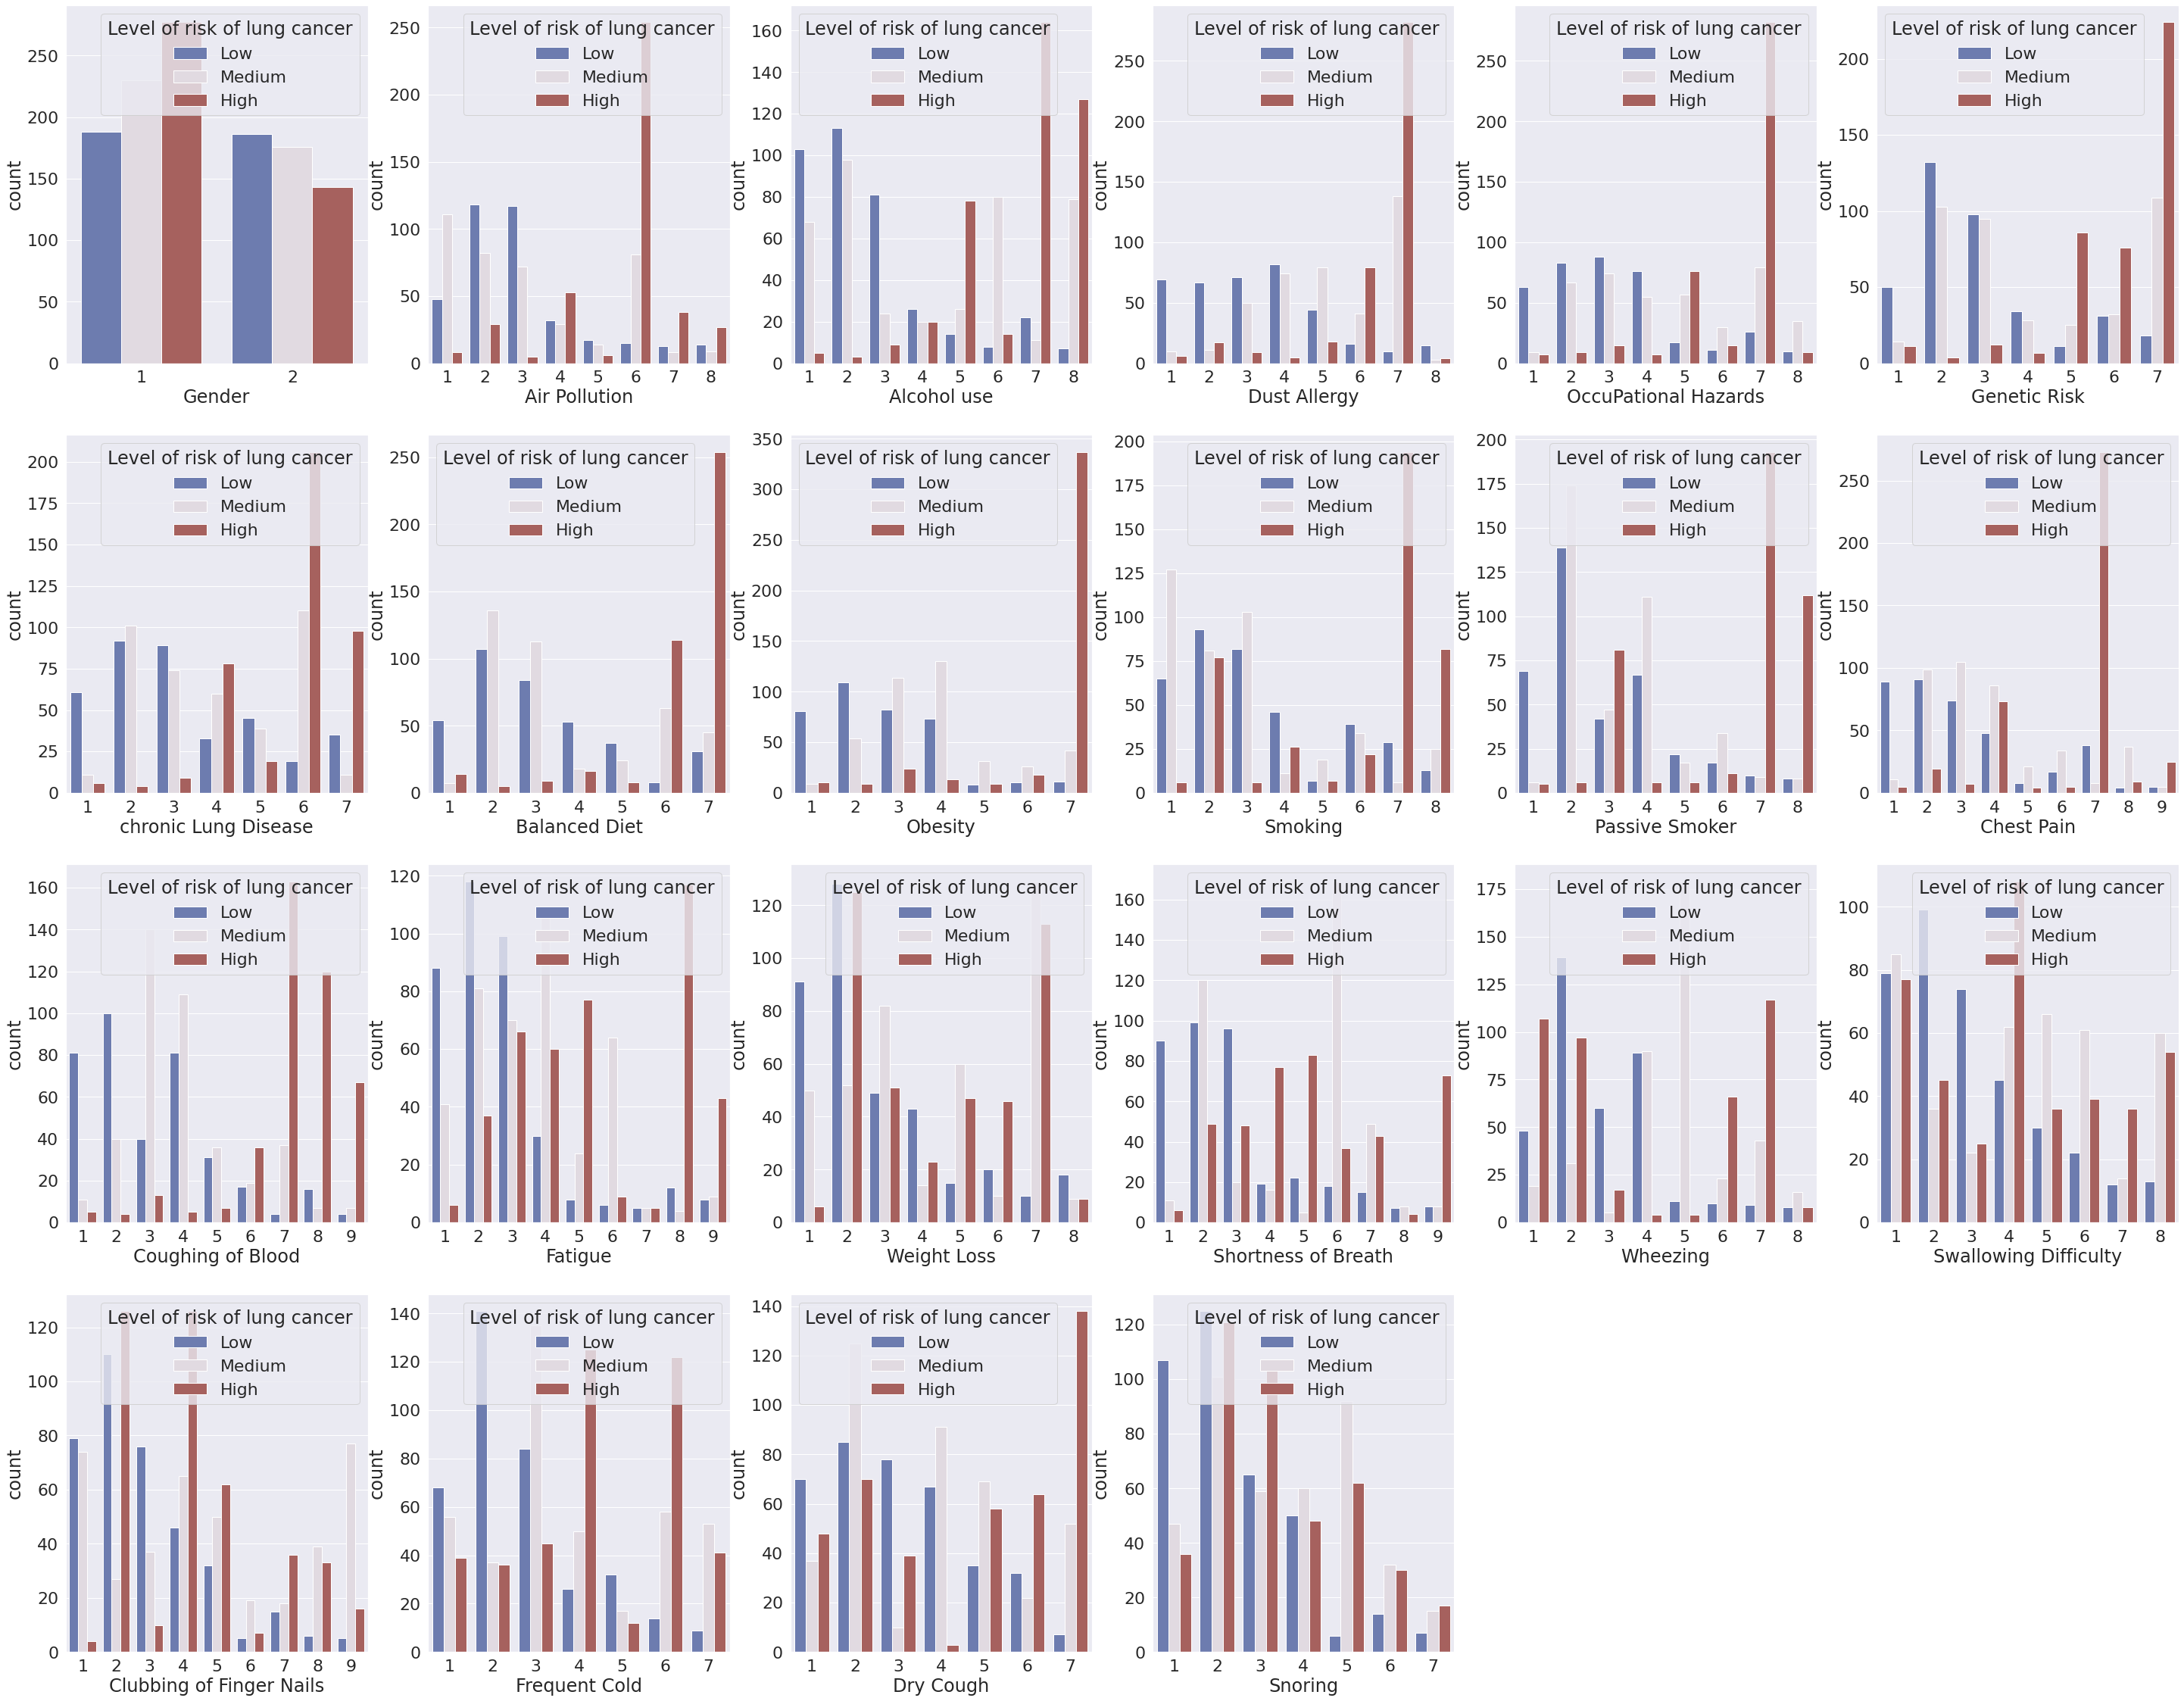

In [14]:
col_new = list(df.columns)
col_new.remove('Age')
col_new.remove('Level')
sns.set(font_scale=2)
plt.figure(figsize=(50,40))
for i in range(len(col_new)):
    plt.subplot(4,6,i+1)
    g = sns.countplot(data=df, x=col_new[i],hue="Level",palette = 'twilight_shifted')
    plt.legend(labels = ['Low','Medium','High'],title = 'Level of risk of lung cancer')

From the above countplots apart from inferring the levels of risk of lung cancer at various levels of feature values, we can also observe that for the features which were not highly correlated with target the bars are similar, that is if we change these feature values, we cannot say that the level of risk of lung cancer is increasing or decreasing in contrast to the features which are highly correlated with the target. For example in passive smoking if someone is a 7 level of passive smoker he/she has a high risk of lung cancer.

# **Pre processing, Scaling the Dataset, & Trainer Class Creation**

In [ ]:
classifiers = {
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Decision Tree (Entropy)': DecisionTreeClassifier(criterion = 'entropy'),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB()
}

In [ ]:
# loading the dataset
dataset = pd.read_csv('/content/augmented_data.csv')
dataset.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [ ]:
dataset.shape

(1200, 24)

In [ ]:
dataset['Level'].value_counts()

2    420
1    406
0    374
Name: Level, dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1200 non-null   int64
 1   Gender                    1200 non-null   int64
 2   Air Pollution             1200 non-null   int64
 3   Alcohol use               1200 non-null   int64
 4   Dust Allergy              1200 non-null   int64
 5   OccuPational Hazards      1200 non-null   int64
 6   Genetic Risk              1200 non-null   int64
 7   chronic Lung Disease      1200 non-null   int64
 8   Balanced Diet             1200 non-null   int64
 9   Obesity                   1200 non-null   int64
 10  Smoking                   1200 non-null   int64
 11  Passive Smoker            1200 non-null   int64
 12  Chest Pain                1200 non-null   int64
 13  Coughing of Blood         1200 non-null   int64
 14  Fatigue                   1200 non-null 

In [ ]:
# scaling the dataset
from sklearn.preprocessing import MinMaxScaler

X = dataset.drop(columns=['Level'], axis=1)
Y = dataset['Level'].values

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)
scaled_df['Level'] = Y
scaled_df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0.311475,0.0,0.142857,0.428571,0.571429,0.428571,0.333333,0.166667,0.166667,0.500000,...,0.250,0.428571,0.125,0.142857,0.285714,0.000,0.166667,0.333333,0.500000,0
1,0.049180,0.0,0.285714,0.000000,0.571429,0.285714,0.500000,0.166667,0.166667,0.166667,...,0.000,0.285714,0.750,1.000000,0.714286,0.125,0.000000,1.000000,0.166667,1
2,0.344262,0.0,0.428571,0.571429,0.714286,0.571429,0.666667,0.500000,0.833333,1.000000,...,0.875,0.857143,1.000,0.142857,0.000000,0.375,0.833333,1.000000,0.166667,2
3,0.377049,0.0,0.857143,0.857143,0.857143,0.857143,0.833333,1.000000,1.000000,1.000000,...,0.375,0.142857,0.250,0.000000,0.428571,0.500,0.833333,1.000000,0.666667,2
4,0.524590,0.0,0.714286,1.000000,0.857143,0.857143,1.000000,0.833333,1.000000,1.000000,...,0.250,0.142857,0.375,0.000000,0.428571,0.125,0.500000,0.166667,0.333333,2


In [ ]:
predictors = scaled_df.drop(columns=['Level'], axis=1)
target = scaled_df['Level']

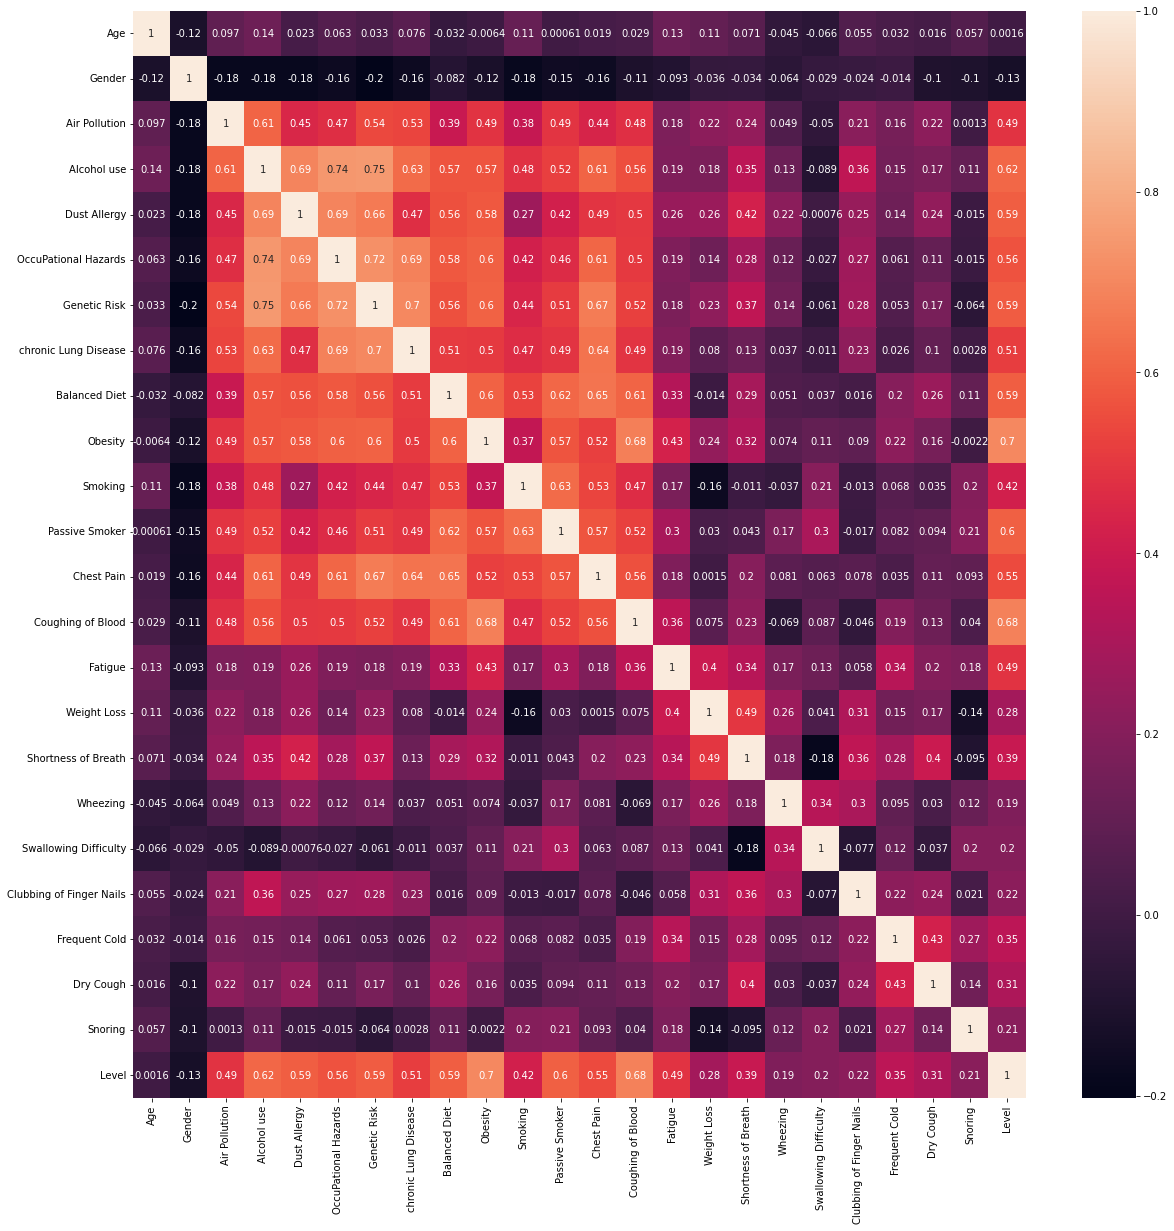

In [ ]:
# correlation of the features
plt.figure(figsize=(20, 20))
sns.heatmap(scaled_df.corr(), annot=True);

In [ ]:
# dataset splitting
from sklearn.model_selection import train_test_split

def get_dataset_partitions_pd(df, train_split=0.8, val_split=0.1, test_split=0.1, target_variable=None):
    assert (train_split + test_split + val_split) == 1
    assert val_split == test_split 

    df_sample = df.sample(frac=1, random_state=12)

    if target_variable is not None:
      grouped_df = df_sample.groupby(target_variable)
      arr_list = [np.split(g, [int(train_split * len(g)), int((1 - val_split) * len(g))]) for i, g in grouped_df]

      train_ds = pd.concat([t[0] for t in arr_list])
      val_ds = pd.concat([t[1] for t in arr_list])
      test_ds = pd.concat([v[2] for v in arr_list])

    else:
      indices_or_sections = [int(train_split * len(df)), int((1 - val_split) * len(df))]
      train_ds, val_ds, test_ds = np.split(df_sample, indices_or_sections)
    
    return train_ds, test_ds, val_ds

In [ ]:

class TrainModel:
  def __init__(self, train_df=None, test_df=None, val_df=None):
    self.models = {
        'SVC': SVC(),
        'KNN': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Decision Tree (Entropy)': DecisionTreeClassifier(criterion = 'entropy'),
        'Logistic Regression': LogisticRegression(),
        'Naive Bayes': GaussianNB()
    }
    self._trained_models = {}
    self.train_accuracies = []
    self.test_accuracies = []
    self.validation_accuracies = []
    self.metrics = {
        'F1-Score': f1_score,
        'Accuracy Score': accuracy_score
    }
    self.train_df = train_df
    self.test_df = test_df
    self.val_df = val_df


  def train_models(self):
    x = self.train_df.drop(columns=['Level'], axis=1)
    y = self.train_df['Level'].astype(int)

    for name, model in self.models.items():
      classifier = model
      classifier.fit(x, y)
      y_pred = classifier.predict(x)

      scores = []
      for met_name, metric in self.metrics.items():
        if met_name == 'F1-Score':
          score = list(metric(y_pred, y, average=None)*100)
        else:
          score = metric(y_pred, y)*100

        scores.append(score)

      self.train_accuracies.append(scores)
      self._trained_models[name] = classifier
      
    return self.train_accuracies

  def test_models(self):
    x = self.test_df.drop(columns=['Level'], axis=1)
    y = self.test_df['Level'].astype(int)

    for name, classifier in self._trained_models.items():
      y_pred = classifier.predict(x)

      scores = []
      for met_name, metric in self.metrics.items():
        if met_name == 'F1-Score':
          score = list(metric(y_pred, y, average=None)*100)
        else:
          score = metric(y_pred, y)*100

        scores.append(score)
      self.test_accuracies.append(scores)
      
    return self.test_accuracies

  def val_models(self):
    x = self.val_df.drop(columns=['Level'], axis=1)
    y = self.val_df['Level'].astype(int)

    for name, classifier in self._trained_models.items():
      y_pred = classifier.predict(x)

      scores = []
      for met_name, metric in self.metrics.items():
        if met_name == 'F1-Score':
          score = list(metric(y_pred, y, average=None)*100)
        else:
          score = metric(y_pred, y)*100

        scores.append(score)
      self.validation_accuracies.append(scores)
      
    return self.validation_accuracies

  def get_scores(self):
    train_accuracy = self.train_models()
    test_accuracy = self.test_models()
    validation_accuracy = self.val_models()

    return train_accuracy, test_accuracy, validation_accuracy

# **Models with Raw Dataset**

In [ ]:
train_df, test_df, val_df = get_dataset_partitions_pd(scaled_df, target_variable='Level')

print(f"Train Dataset Shape: \n{train_df['Level'].value_counts().sort_index() / len(train_df)} \n")
print(f"Test Dataset Shape: \n{test_df['Level'].value_counts().sort_index() / len(test_df)}\n")
print(f"Validation Dataset Shape: \n{val_df['Level'].value_counts().sort_index() / len(val_df)}\n")

Train Dataset Shape: 
0    0.311783
1    0.337852
2    0.350365
Name: Level, dtype: float64 

Test Dataset Shape: 
0    0.314050
1    0.338843
2    0.347107
Name: Level, dtype: float64

Validation Dataset Shape: 
0    0.308333
1    0.341667
2    0.350000
Name: Level, dtype: float64



In [ ]:
trainer = TrainModel(train_df, test_df, val_df)
train_scores, test_scores, val_scores = trainer.get_scores()

# **Models with only highly Correlated Features**

In [ ]:
# function to get highly correlated features having correlation ratio > 0.60
def get_features():
  columns = list(scaled_df.columns)
  corr = scaled_df.corr().abs()
  upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
  features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.60)]
  features.append('Gender')
  features.remove('Level')

  return features

In [ ]:
features = get_features()
correlated_data = scaled_df.filter(features, axis=1)
correlated_data['Level'] = scaled_df['Level']
correlated_data.head()

,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Obesity,Passive Smoker,Chest Pain,Coughing of Blood,Gender,Level
0,0.428571,0.571429,0.428571,0.333333,0.166667,0.500000,0.142857,0.125,0.375,0.0,0
1,0.000000,0.571429,0.285714,0.500000,0.166667,0.166667,0.428571,0.125,0.250,0.0,1
2,0.571429,0.714286,0.571429,0.666667,0.500000,1.000000,0.285714,0.375,0.875,0.0,2
3,0.857143,0.857143,0.857143,0.833333,1.000000,1.000000,0.857143,0.750,0.875,0.0,2
4,1.000000,0.857143,0.857143,1.000000,0.833333,1.000000,0.857143,0.750,1.000,0.0,2


In [ ]:
corr_train_df, corr_test_df, corr_val_df = get_dataset_partitions_pd(correlated_data, target_variable='Level')

print(f"Train Dataset Shape: \n{corr_train_df['Level'].value_counts().sort_index() / len(corr_train_df)} \n")
print(f"Test Dataset Shape: \n{corr_test_df['Level'].value_counts().sort_index() / len(corr_test_df)}\n")
print(f"Validation Dataset Shape: \n{corr_val_df['Level'].value_counts().sort_index() / len(corr_val_df)}\n")

Train Dataset Shape: 
0    0.311783
1    0.337852
2    0.350365
Name: Level, dtype: float64 

Test Dataset Shape: 
0    0.314050
1    0.338843
2    0.347107
Name: Level, dtype: float64

Validation Dataset Shape: 
0    0.308333
1    0.341667
2    0.350000
Name: Level, dtype: float64



In [ ]:
corr_trainer = TrainModel(corr_train_df, corr_test_df, corr_val_df)
corr_train_scores, corr_test_scores, corr_val_scores = corr_trainer.get_scores()

# **Feature Selection Using Chi-Square Method**

In [ ]:
X = scaled_df.drop(columns=['Level'], axis=1)
Y = scaled_df['Level']

# chi-square method implementation
chi_scores = chi2(X,Y)

Text(0, 0.5, 'p-value')

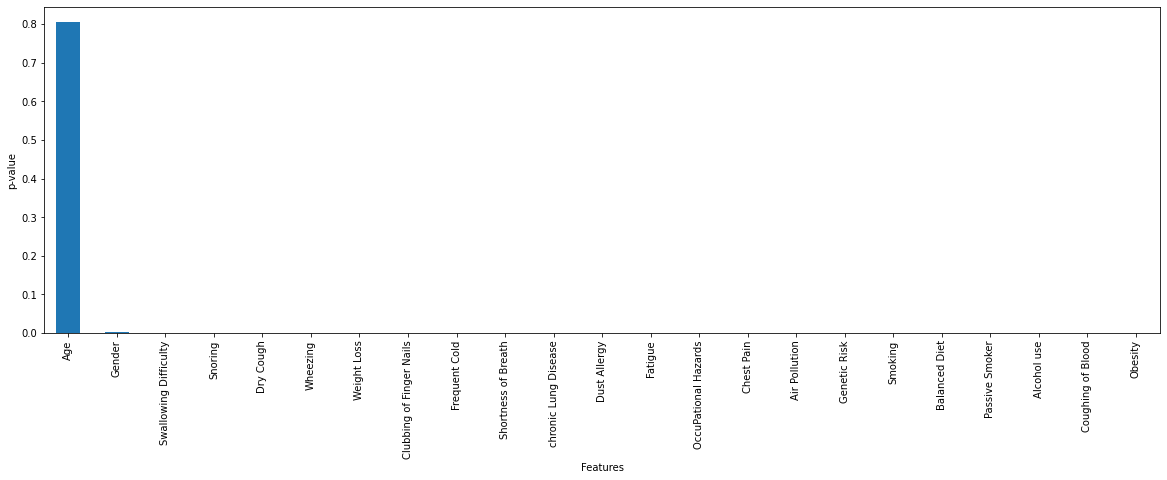

In [ ]:
plt.figure(figsize=(20, 6))

p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

p_values.plot.bar()
plt.xlabel("Features")
plt.ylabel("p-value")

In a chi-square analysis, the p-value is the probability of obtaining a chi-square as large or larger than that in the current experiment and yet the data will still support the hypothesis. It is the probability of deviations from what was expected being due to mere chance.

Age is having highest chi-square value, so this feature can not be considered in the model training.

In [ ]:
X = X.drop(columns=['Age'], axis=1)
X['Level'] = Y

In [ ]:
chi_train_df, chi_test_df, chi_val_df = get_dataset_partitions_pd(X, target_variable='Level')

print(f"Train Dataset Shape: \n{chi_train_df['Level'].value_counts().sort_index() / len(chi_train_df)} \n")
print(f"Test Dataset Shape: \n{chi_test_df['Level'].value_counts().sort_index() / len(chi_test_df)}\n")
print(f"Validation Dataset Shape: \n{chi_val_df['Level'].value_counts().sort_index() / len(chi_val_df)}\n")

Train Dataset Shape: 
0    0.311783
1    0.337852
2    0.350365
Name: Level, dtype: float64 

Test Dataset Shape: 
0    0.314050
1    0.338843
2    0.347107
Name: Level, dtype: float64

Validation Dataset Shape: 
0    0.308333
1    0.341667
2    0.350000
Name: Level, dtype: float64



In [ ]:
chi_trainer = TrainModel(chi_train_df, chi_test_df, chi_val_df)
chi_train_scores, chi_test_scores, chi_val_scores = chi_trainer.get_scores()

# **Feature Selection using Sequential Forward Selection**

In [ ]:
model_features = []

def get_best_features():
  for name, classifier in classifiers.items():
    feature_selector = SFS(classifier, k_features='best', forward=True, floating=True, scoring = 'f1_micro', cv = 0)
    feature_selector.fit(predictors, target)
    best_features = list(feature_selector.k_feature_names_)

    model_feature_pair = {}
    model_feature_pair[name] = best_features
    model_features.append(model_feature_pair)

  return model_features

In [ ]:
train_accuracies_per_model = []
test_accuracies_per_model = []
val_accuracies_per_model = []

def best_model_trainer():
  model_feature_list = get_best_features()

  for pair in model_feature_list:
    model = list(pair.keys())[0]
    features = list(pair.values())[0]
    temp_df = scaled_df.filter(features, axis=1)
    temp_df['Level'] = scaled_df['Level']

    temp_train_df, temp_val_df, temp_test_df = get_dataset_partitions_pd(temp_df, target_variable='Level')
    temp_trainer = TrainModel(temp_train_df, temp_test_df, temp_val_df)
    temp_train_scores, temp_test_scores, temp_val_scores = temp_trainer.get_scores()

    train_data = {model: temp_train_scores}
    test_data = {model: temp_test_scores}
    val_data = {model: temp_val_scores}

    train_accuracies_per_model.append(train_data)
    test_accuracies_per_model.append(test_data)
    val_accuracies_per_model.append(val_data)

  print(train_accuracies_per_model)
  print()
  print(test_accuracies_per_model)
  print()
  print(val_accuracies_per_model)

In [ ]:
best_model_trainer()

[{'SVC': [[[96.29629629629629, 96.25187406296853, 97.71689497716895], 96.76746611053181], [[91.54228855721394, 90.19607843137256, 93.55828220858896], 91.76225234619395], [[100.0, 100.0, 100.0], 100.0], [[100.0, 100.0, 100.0], 100.0], [[100.0, 100.0, 100.0], 100.0], [[84.65608465608466, 82.33576642335765, 90.3903903903904], 85.81856100104275], [[80.0, 70.33639143730888, 84.72622478386167], 78.41501564129302]]}, {'KNN': [[[95.66666666666667, 96.2178517397882, 97.41248097412482], 96.4546402502607], [[93.44262295081968, 92.54185692541856, 95.23809523809524], 93.74348279457769], [[100.0, 100.0, 100.0], 100.0], [[100.0, 100.0, 100.0], 100.0], [[100.0, 100.0, 100.0], 100.0], [[85.91304347826087, 85.1963746223565, 91.92364170337738], 87.7997914494265], [[79.72027972027972, 76.0233918128655, 89.72809667673715], 81.85610010427528]]}, {'Random Forest': [[[82.15384615384616, 83.06188925081433, 92.9663608562691], 86.13138686131386], [[89.3687707641196, 91.07692307692307, 93.993993993994], 91.553701

In [ ]:
print(len(train_accuracies_per_model))
print(len(test_accuracies_per_model))
print(len(val_accuracies_per_model))

7
7
7


# **Creating Dataframe of Accuracies**

In [ ]:

def add_data(dataset_type, score_list, accuracy_type):
  metric_df = pd.DataFrame(columns=['Model', 'DatasetType', 'Accuracy', 'F1-Score (0)', 'F1-Score (1)', 'F1-Score (2)', 'AccuracyType'])
  metric_df['Model'] = classifiers.keys()
  metric_df['DatasetType'] = dataset_type
  metric_df['Accuracy'] = [i[1] for i in score_list]
  metric_df['AccuracyType'] = accuracy_type
  metric_df['F1-Score (0)'] = [i[0][0] for i in score_list]
  metric_df['F1-Score (1)'] = [i[0][1] for i in score_list]
  metric_df['F1-Score (2)'] = [i[0][2] for i in score_list]

  return metric_df

In [ ]:
# adding noisy dataset accuracies
train_df = add_data('Noisy', train_scores, 'Train')
test_df = add_data('Noisy', test_scores, 'Test')
val_df = add_data('Noisy', val_scores, 'Validation')

final_metric_df_1 = pd.concat([train_df, test_df, val_df], axis=0)
final_metric_df_1

,Model,DatasetType,Accuracy,F1-Score (0),F1-Score (1),F1-Score (2),AccuracyType
0,SVC,Noisy,96.767466,96.806723,96.263079,97.247706,Train
1,KNN,Noisy,91.240876,91.126280,89.380531,93.272171,Train
2,Random Forest,Noisy,100.000000,100.000000,100.000000,100.000000,Train
3,Decision Tree,Noisy,100.000000,100.000000,100.000000,100.000000,Train
4,Decision Tree (Entropy),Noisy,100.000000,100.000000,100.000000,100.000000,Train
5,Logistic Regression,Noisy,88.946820,87.796610,87.022901,91.827637,Train
6,Naive Bayes,Noisy,77.789364,79.789104,70.286576,83.381924,Train
0,SVC,Noisy,86.776860,88.000000,86.021505,86.486486,Test
1,KNN,Noisy,87.603306,88.607595,86.363636,88.000000,Test
2,Random Forest,Noisy,87.603306,87.179487,88.888889,86.486486,Test


In [ ]:
# adding highly correlated dataset accuracies
train_df = add_data('Highly Correlated', corr_train_scores, 'Train')
test_df = add_data('Highly Correlated', corr_test_scores, 'Test')
val_df = add_data('Highly Correlated', corr_val_scores, 'Validation')

final_metric_df_2 = pd.concat([train_df, test_df, val_df], axis=0)
final_metric_df_2

,Model,DatasetType,Accuracy,F1-Score (0),F1-Score (1),F1-Score (2),AccuracyType
0,SVC,Highly Correlated,92.283629,89.836066,90.322581,96.499239,Train
1,KNN,Highly Correlated,91.240876,89.072848,90.332326,94.171779,Train
2,Random Forest,Highly Correlated,100.000000,100.000000,100.000000,100.000000,Train
3,Decision Tree,Highly Correlated,100.000000,100.000000,100.000000,100.000000,Train
4,Decision Tree (Entropy),Highly Correlated,100.000000,100.000000,100.000000,100.000000,Train
5,Logistic Regression,Highly Correlated,71.011470,67.423015,56.711409,86.241135,Train
6,Naive Bayes,Highly Correlated,67.049009,68.256334,45.818182,82.639885,Train
0,SVC,Highly Correlated,88.429752,85.365854,90.243902,89.743590,Test
1,KNN,Highly Correlated,88.429752,88.888889,89.411765,86.842105,Test
2,Random Forest,Highly Correlated,89.256198,91.139241,89.411765,87.179487,Test


In [ ]:
# adding chi-2 dataset accuracies
train_df = add_data('chi2', chi_train_scores, 'Train')
test_df = add_data('chi2', chi_test_scores, 'Test')
val_df = add_data('chi2', chi_val_scores, 'Validation')

final_metric_df_3 = pd.concat([train_df, test_df, val_df], axis=0)
final_metric_df_3

,Model,DatasetType,Accuracy,F1-Score (0),F1-Score (1),F1-Score (2),AccuracyType
0,SVC,chi2,96.871741,96.806723,96.407186,97.404580,Train
1,KNN,chi2,91.449426,91.156463,89.837997,93.394777,Train
2,Random Forest,chi2,100.000000,100.000000,100.000000,100.000000,Train
3,Decision Tree,chi2,100.000000,100.000000,100.000000,100.000000,Train
4,Decision Tree (Entropy),chi2,100.000000,100.000000,100.000000,100.000000,Train
5,Logistic Regression,chi2,88.738269,87.266553,86.850153,91.851852,Train
6,Naive Bayes,chi2,77.893639,79.649123,70.588235,83.503650,Train
0,SVC,chi2,85.950413,86.842105,84.782609,86.486486,Test
1,KNN,chi2,85.950413,87.179487,84.444444,86.486486,Test
2,Random Forest,chi2,84.297521,83.544304,83.146067,86.486486,Test


In [ ]:
final_metric_df = pd.concat([final_metric_df_1, final_metric_df_2, final_metric_df_3], axis=0, ignore_index = True)
final_metric_df.reset_index()
final_metric_df

,Model,DatasetType,Accuracy,F1-Score (0),F1-Score (1),F1-Score (2),AccuracyType
0,SVC,Noisy,96.767466,96.806723,96.263079,97.247706,Train
1,KNN,Noisy,91.240876,91.126280,89.380531,93.272171,Train
2,Random Forest,Noisy,100.000000,100.000000,100.000000,100.000000,Train
3,Decision Tree,Noisy,100.000000,100.000000,100.000000,100.000000,Train
4,Decision Tree (Entropy),Noisy,100.000000,100.000000,100.000000,100.000000,Train
...,...,...,...,...,...,...,...
58,Random Forest,chi2,89.166667,84.507042,89.887640,92.500000,Validation
59,Decision Tree,chi2,88.333333,83.333333,89.655172,91.358025,Validation
60,Decision Tree (Entropy),chi2,91.666667,91.666667,93.023256,90.243902,Validation
61,Logistic Regression,chi2,88.333333,86.111111,85.057471,93.827160,Validation


# **Plotting the Accuracy Curves**

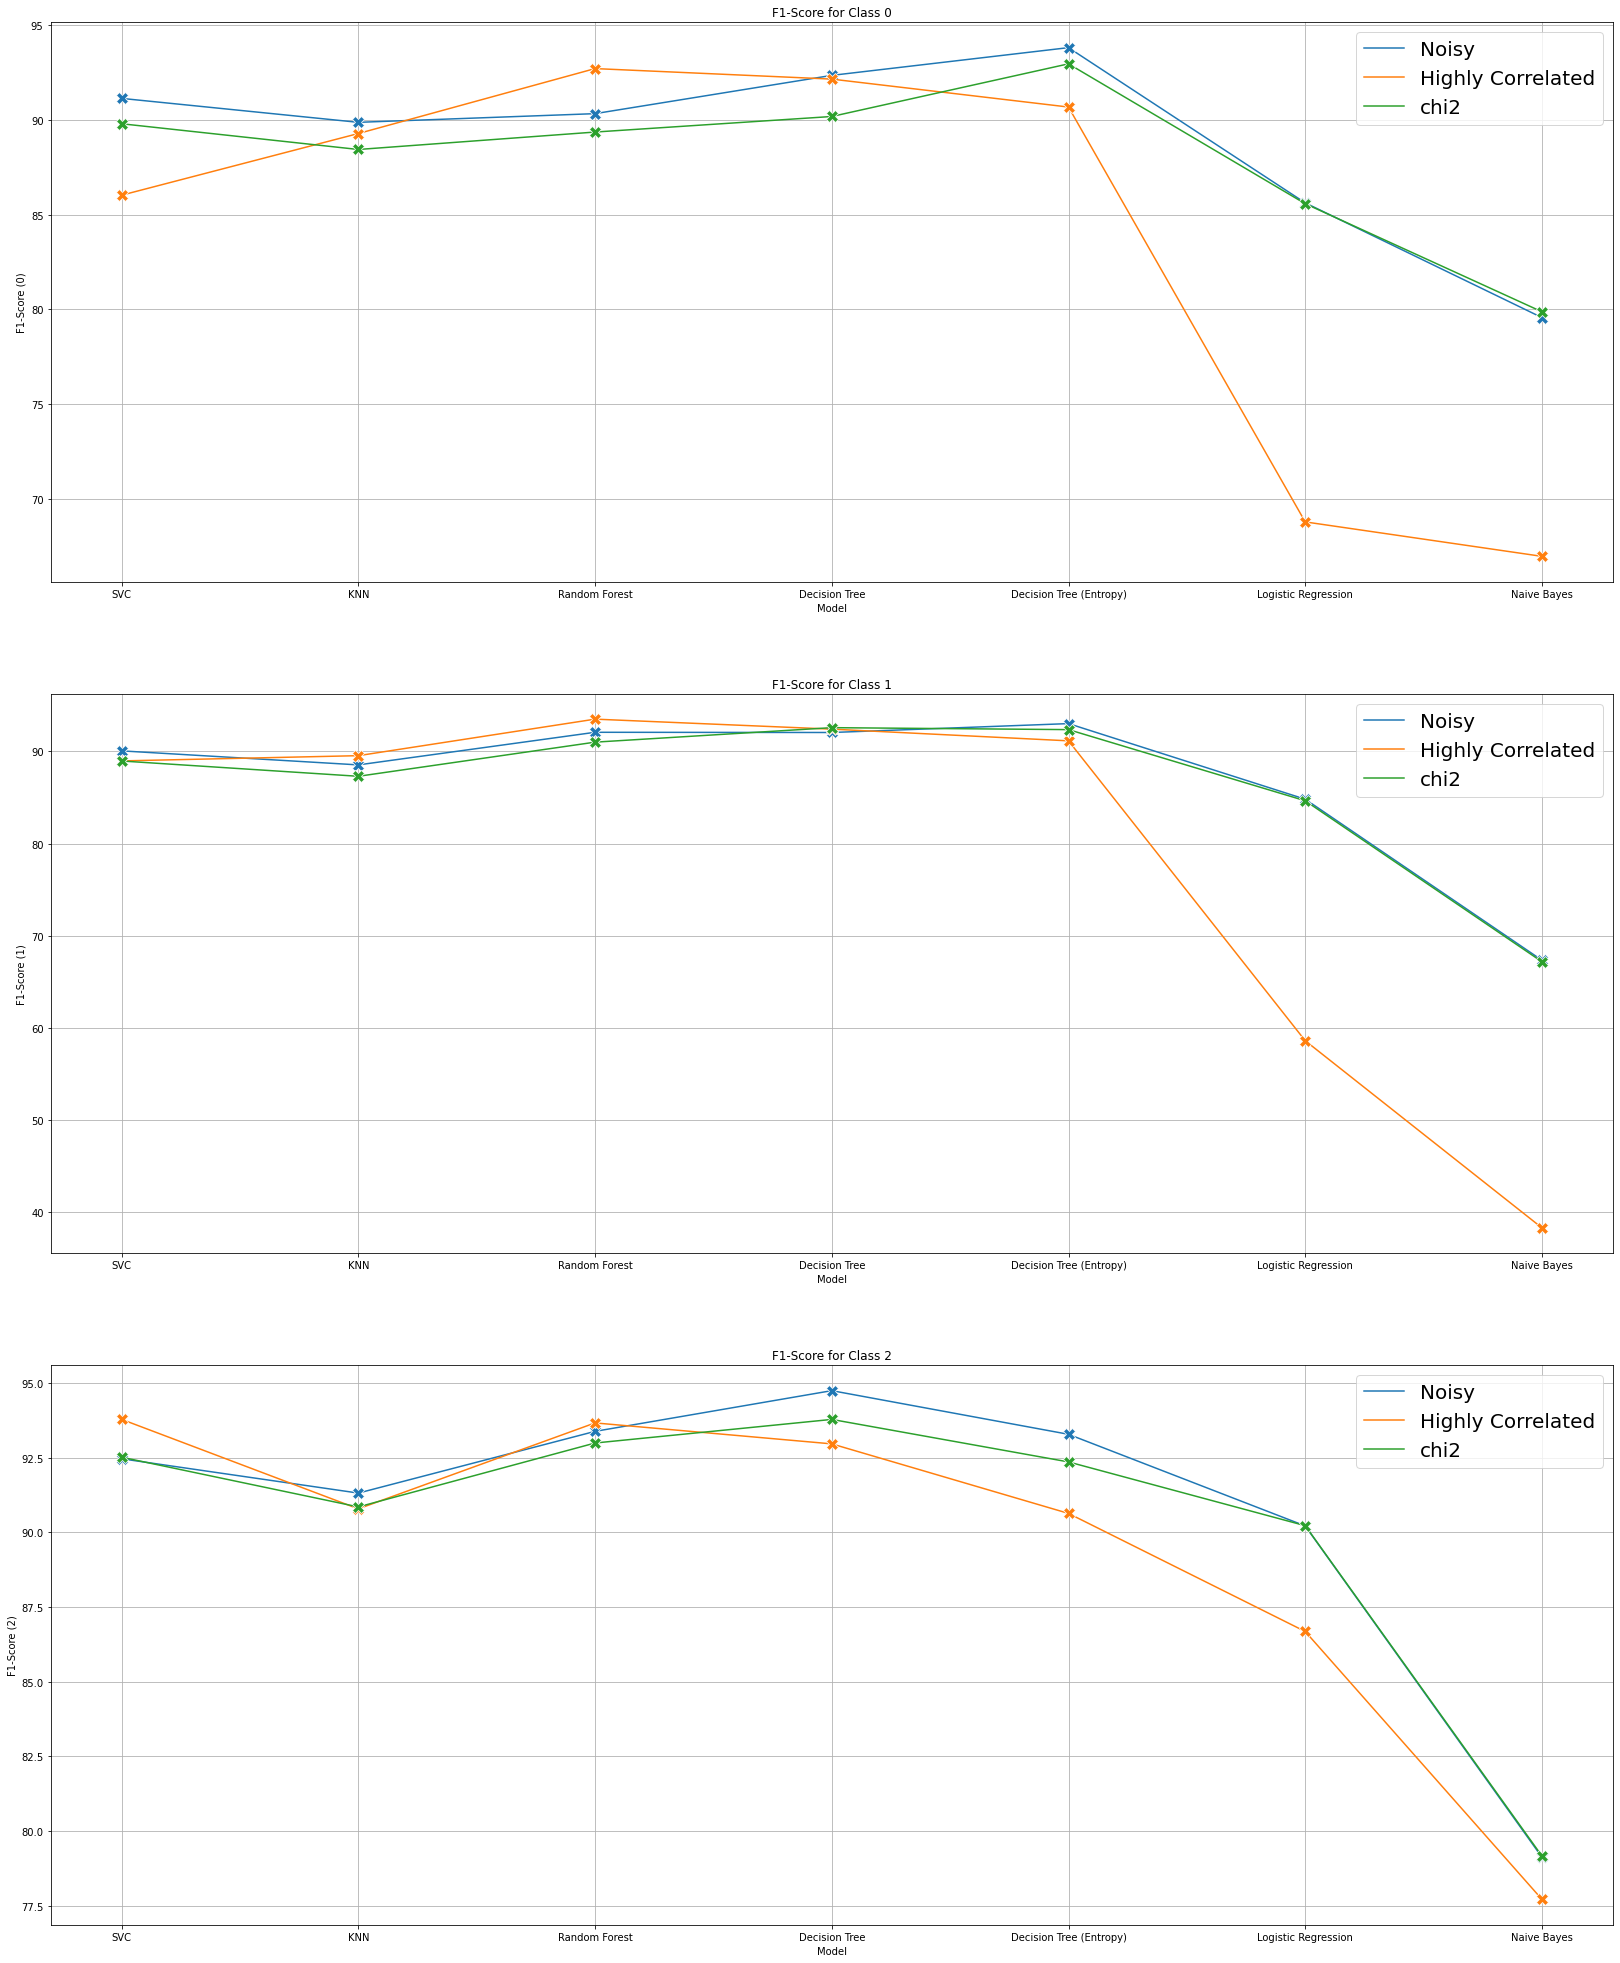

In [ ]:
plt.figure(figsize=(28, 35))

for i in range(3):
  plt.subplot(3, 1, i+1)
  plot = sns.lineplot(data=final_metric_df, x="Model", y="F1-Score ({})".format(i), hue='DatasetType', marker="X", ci=None, markersize=12)
  plot.legend(fontsize=20)
  plt.title("F1-Score for Class {}".format(i))
  plt.grid()

plt.show()

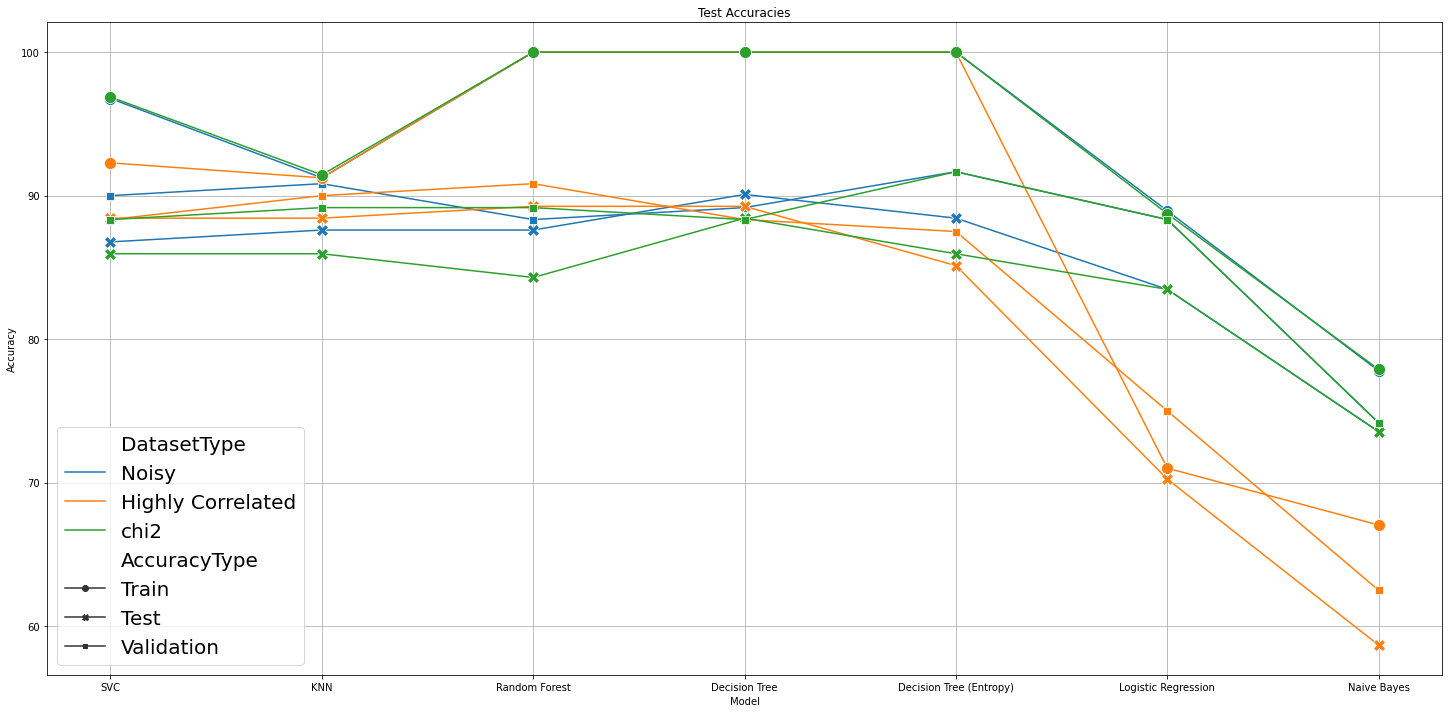

In [ ]:
plt.figure(figsize=(25, 12))
plot = sns.lineplot(data=final_metric_df, x="Model", y="Accuracy", hue='DatasetType', style="AccuracyType", markers=True, dashes=False, ci=None, markersize=12)
plot.legend(fontsize=20)
plt.title('Test Accuracies')
plt.grid()

# **Plotting the SFS Model Accuracies**

In [ ]:
sfs_df = pd.DataFrame(columns = ['Estimator', 'Model', 'Accuracy'])

In [ ]:
models = list(classifiers.keys())

estimator_list = []
model_list = []
accuracy_list = []

for pair in test_accuracies_per_model:
  estimator_list.append(list(pair.keys())*7)
  for i in range(len(models)):
    model_list.append(models[i])
    accuracy_list.append(list(pair.values())[0][i][1])

estimator_list = [element for sub_list in estimator_list for element in sub_list]  
sfs_df['Estimator'] = estimator_list
sfs_df['Model'] = model_list
sfs_df['Accuracy'] = accuracy_list

sfs_df.head()

,Estimator,Model,Accuracy
0,SVC,SVC,90.833333
1,SVC,KNN,92.500000
2,SVC,Random Forest,90.000000
3,SVC,Decision Tree,90.833333
4,SVC,Decision Tree (Entropy),90.000000


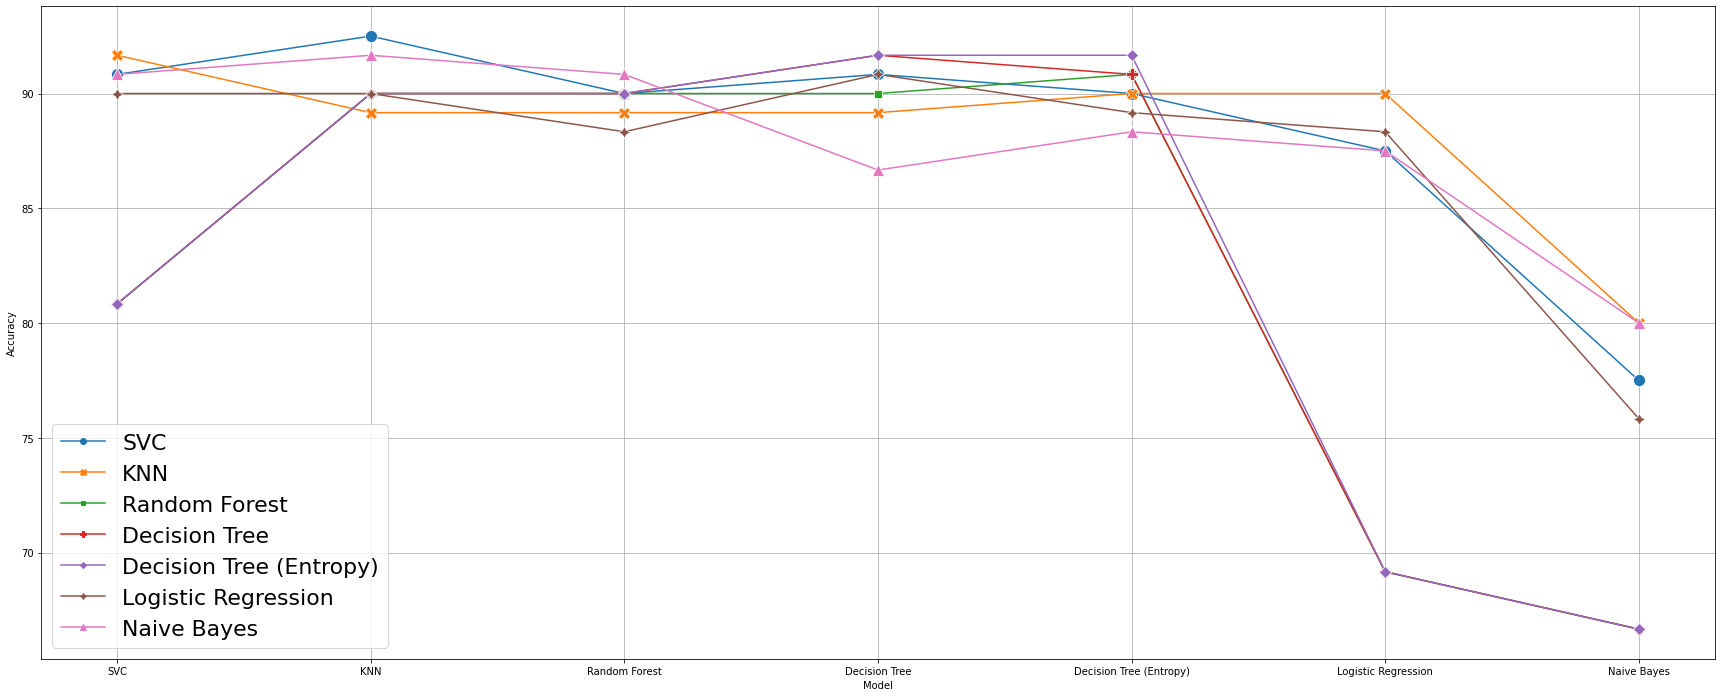

In [ ]:
plt.figure(figsize=(30, 12))
plot = sns.lineplot(data=sfs_df, x="Model", y="Accuracy", hue='Estimator', markers=True, dashes=False, style='Estimator', markersize=12)
plot.legend(fontsize=22)
plt.grid()

From this graph, we can see that KNN is the best estimator for SFS.

In [ ]:
knn_feature_selector = SFS(KNeighborsClassifier(), k_features='best', forward=True, floating=True, scoring = 'f1_micro', cv = 0)
knn_feature_selector.fit(predictors, target)
knn_best_features = list(knn_feature_selector.k_feature_names_)

In [ ]:
knn_best_features

['Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'Obesity',
 'Passive Smoker',
 'Coughing of Blood',
 'Fatigue',
 'Weight Loss',
 'Wheezing',
 'Swallowing Difficulty',
 'Frequent Cold',
 'Snoring']

In [ ]:
X = predictors.filter(knn_best_features, axis=1)
X['Level'] = target

In [ ]:
knn_train_df, knn_test_df, knn_val_df = get_dataset_partitions_pd(X, target_variable='Level')

print(f"Train Dataset Shape: \n{knn_train_df['Level'].value_counts().sort_index() / len(knn_train_df)} \n")
print(f"Test Dataset Shape: \n{knn_test_df['Level'].value_counts().sort_index() / len(knn_test_df)}\n")
print(f"Validation Dataset Shape: \n{knn_val_df['Level'].value_counts().sort_index() / len(knn_val_df)}\n")

Train Dataset Shape: 
0    0.311783
1    0.337852
2    0.350365
Name: Level, dtype: float64 

Test Dataset Shape: 
0    0.314050
1    0.338843
2    0.347107
Name: Level, dtype: float64

Validation Dataset Shape: 
0    0.308333
1    0.341667
2    0.350000
Name: Level, dtype: float64



In [ ]:
knn_trainer = TrainModel(knn_train_df, knn_test_df, knn_val_df)
knn_train_scores, knn_test_scores, knn_val_scores = knn_trainer.get_scores()

In [ ]:
knn_train_df = add_data('SFS', knn_train_scores, 'Train')
knn_test_df = add_data('SFS', knn_test_scores, 'Test')
knn_val_df = add_data('SFS', knn_val_scores, 'Validation')

knn_metric_df = pd.concat([knn_train_df, knn_test_df, knn_val_df], axis=0)
knn_metric_df

,Model,DatasetType,Accuracy,F1-Score (0),F1-Score (1),F1-Score (2),AccuracyType
0,SVC,SFS,96.454640,95.666667,96.217852,97.412481,Train
1,KNN,SFS,93.743483,93.442623,92.541857,95.238095,Train
2,Random Forest,SFS,100.000000,100.000000,100.000000,100.000000,Train
3,Decision Tree,SFS,100.000000,100.000000,100.000000,100.000000,Train
4,Decision Tree (Entropy),SFS,100.000000,100.000000,100.000000,100.000000,Train
5,Logistic Regression,SFS,87.799791,85.913043,85.196375,91.923642,Train
6,Naive Bayes,SFS,81.856100,79.720280,76.023392,89.728097,Train
0,SVC,SFS,89.256198,90.000000,90.697674,86.842105,Test
1,KNN,SFS,87.603306,87.500000,89.411765,85.714286,Test
2,Random Forest,SFS,87.603306,87.500000,87.058824,88.311688,Test


In [ ]:
optimized_metric = pd.concat([knn_metric_df, final_metric_df], axis=0, ignore_index=True)
optimized_metric.head()

,Model,DatasetType,Accuracy,F1-Score (0),F1-Score (1),F1-Score (2),AccuracyType
0,SVC,SFS,96.454640,95.666667,96.217852,97.412481,Train
1,KNN,SFS,93.743483,93.442623,92.541857,95.238095,Train
2,Random Forest,SFS,100.000000,100.000000,100.000000,100.000000,Train
3,Decision Tree,SFS,100.000000,100.000000,100.000000,100.000000,Train
4,Decision Tree (Entropy),SFS,100.000000,100.000000,100.000000,100.000000,Train


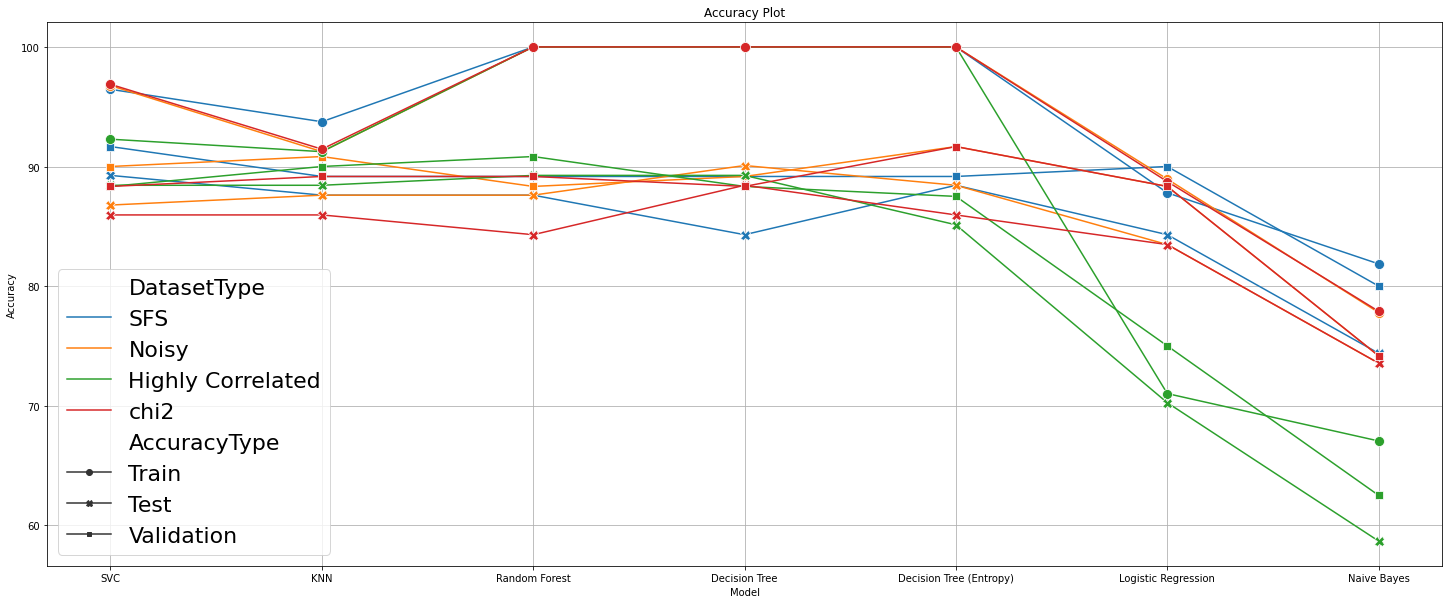

In [ ]:
plt.figure(figsize=(25, 10))
plot = sns.lineplot(data=optimized_metric, 
             x="Model", y="Accuracy", 
             hue='DatasetType', style="AccuracyType", 
             markers=True, dashes=False, ci=None, markersize=10)
plt.title("Accuracy Plot")
plot.legend(fontsize=22)
plt.grid()

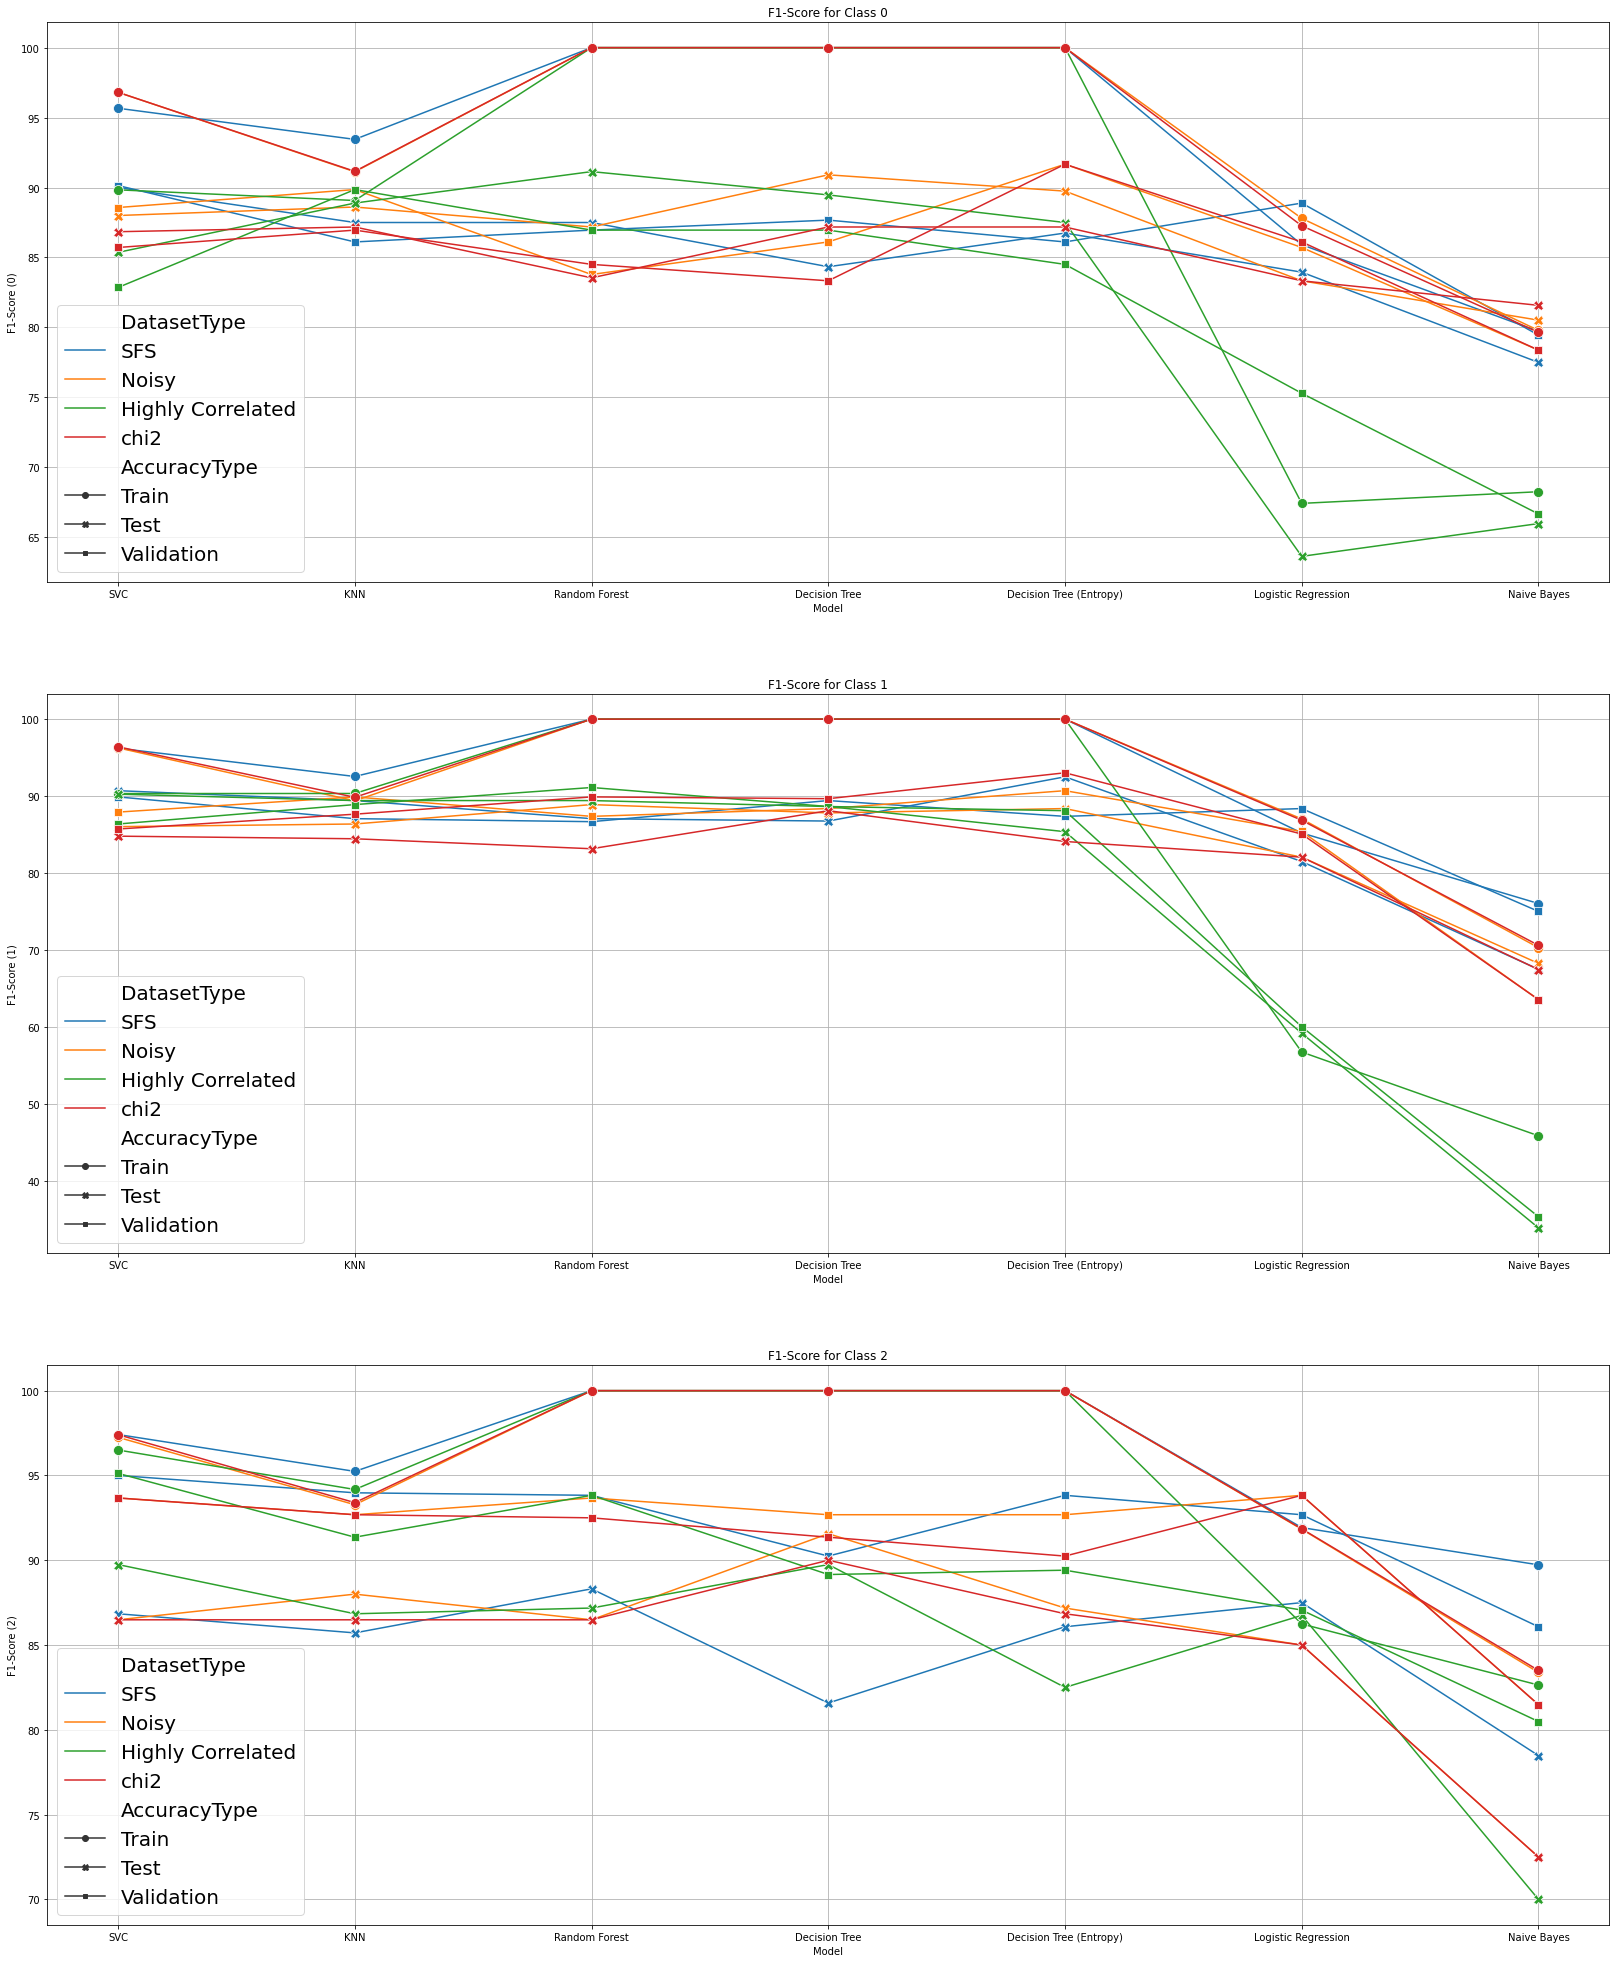

In [ ]:
plt.figure(figsize=(28, 35))

for i in range(3):
  plt.subplot(3, 1, i+1)
  plot = sns.lineplot(data=optimized_metric, 
               x="Model", y="F1-Score ({})".format(i), 
               hue='DatasetType', style="AccuracyType", 
               markers=True, dashes=False, ci=None, 
               markersize=10)
  plot.legend(fontsize=20)
  plt.title("F1-Score for Class {}".format(i))
  plt.grid()

plt.show()

# **Sorted Dataset by Accuracy**

In [ ]:
optimized_metric.head()

,Model,DatasetType,Accuracy,F1-Score (0),F1-Score (1),F1-Score (2),AccuracyType
0,SVC,SFS,96.454640,95.666667,96.217852,97.412481,Train
1,KNN,SFS,93.743483,93.442623,92.541857,95.238095,Train
2,Random Forest,SFS,100.000000,100.000000,100.000000,100.000000,Train
3,Decision Tree,SFS,100.000000,100.000000,100.000000,100.000000,Train
4,Decision Tree (Entropy),SFS,100.000000,100.000000,100.000000,100.000000,Train


In [ ]:
final_df = optimized_metric.sort_values(by=['Accuracy'], ascending=False)
final_df.head()

,Model,DatasetType,Accuracy,F1-Score (0),F1-Score (1),F1-Score (2),AccuracyType
2,Random Forest,SFS,100.0,100.0,100.0,100.0,Train
3,Decision Tree,SFS,100.0,100.0,100.0,100.0,Train
4,Decision Tree (Entropy),SFS,100.0,100.0,100.0,100.0,Train
67,Decision Tree (Entropy),chi2,100.0,100.0,100.0,100.0,Train
66,Decision Tree,chi2,100.0,100.0,100.0,100.0,Train


In [ ]:
final_df.to_csv('accuracy.csv')